Philippe Joly 2024-07-10

# Football Field Line Detection

This is a second attempt at detecting and segmenting lines on a football field. The methods used here are inspired by [Will Riedel, Devin Guillory, Tim Mwangi](https://stacks.stanford.edu/file/druid:yt916dh6570/Guillory_Mwangi_Riedel_Player_Identification_and_Tracking.pdf).

## Loading Images

In [170]:
import cv2
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd

In [171]:
test_imgs = [
    "./test_images/field.jpeg",
    "./test_images/1.jpg",
    "./test_images/2.jpg",
    "./test_images/field2.jpg",
    "./test_images/test_img.png",
    "./test_images/test_img2.png"
]

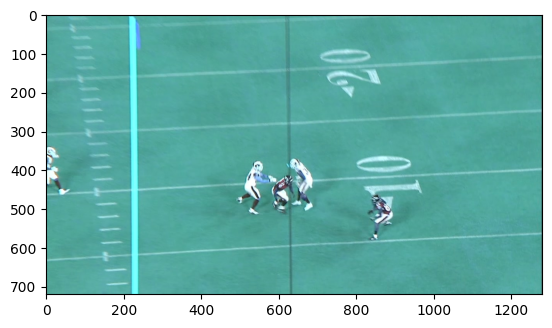

In [172]:
img_og = cv2.imread(test_imgs[1])
plt.imshow(img_og)

# Preprocessing

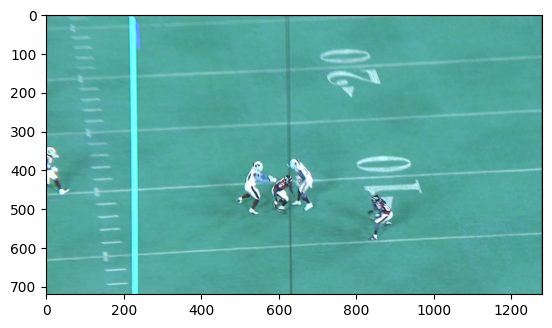

In [173]:
hsv = cv2.cvtColor(img_og, cv2.COLOR_BGR2HSV)
gray = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)
_, binary = cv2.threshold(hsv, 175, 255, cv2.THRESH_BINARY)
plt.imshow(gray)

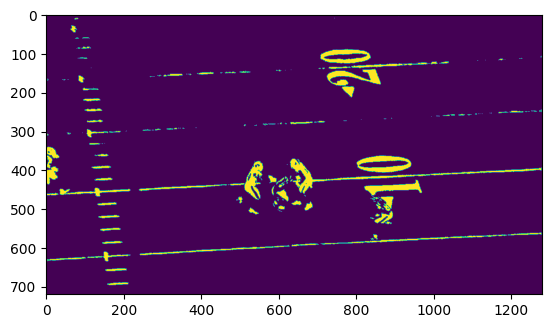

In [174]:
# HSV 
## hue 0->179
## saturation 0->255
## value 0->255

lower_white = np.array([0,0,180])
upper_white = np.array([180, 100, 255])

hsv = cv2.cvtColor(img_og, cv2.COLOR_BGR2HSV)
binary = cv2.inRange(hsv, lower_white, upper_white)
plt.imshow(binary)

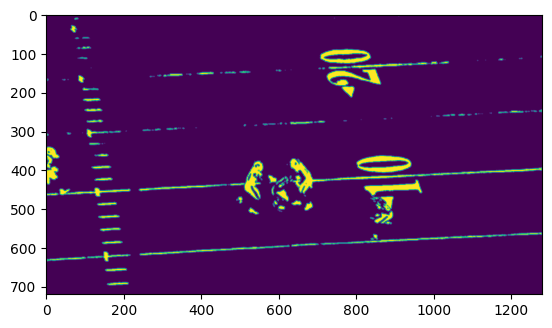

In [175]:
binary_blurred = cv2.GaussianBlur(binary, (5, 5), 0)
plt.imshow(binary_blurred)

## Line Detection

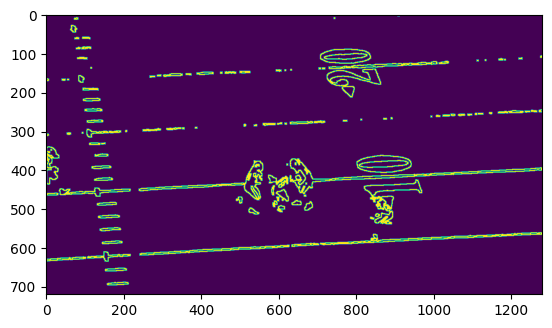

In [176]:
edges = cv2.Canny(binary_blurred, 75, 120)
kernel = np.ones((3,3), np.uint8)
edges = cv2.dilate(edges, kernel, iterations=1)

plt.imshow(edges)

In [177]:
# Hough Lines
## params
rho = 1  # Distance resolution in pixels
theta = np.pi / 180  # Angle resolution in radians
threshold = 100  # Accumulator threshold
minLineLength = 200  # Minimum length of a line
maxLineGap = 10  # Maximum allowed gap between points on the same line

lines = cv2.HoughLinesP(edges, rho=rho, theta=theta, threshold=threshold, minLineLength=minLineLength, maxLineGap=maxLineGap)

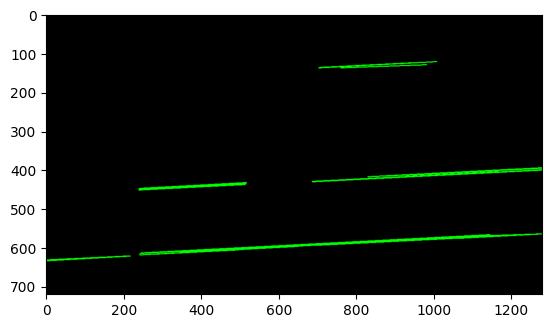

In [178]:
lines_draw = np.zeros_like(img_og)

if lines is not None:
    for line in lines:
        x1, y1, x2, y2 = line[0]
        cv2.line(lines_draw, (x1, y1), (x2, y2), (0, 255, 0), 2)

plt.imshow(lines_draw)